# Table Of Contents
1. [Visualize the Data](#1)
1. [Trip Duration](#2)
    1. [Described](#3)
    1. [Longest Trips in Hours - Bar Plot](#4)
    1. [Shortest Trips in Seconds - Bar Plot](#5)
1. [User Type](#6)
    1. [Described](#7)
    1. [User Type - Pie Chart](#8)
1. [Gender](#9)
    1. [Described](#10)
    1. [Gender - Pie Chart](#11)
1. [Bike ID](#12)
    1. [The most used bike](#13)
1. [Stations](#14)
    1. [The longest Trip starting and ending stations](#15)
    1. [The station with most starts](#16)
1. [Mixed Analytics](#17)
    1. [Gender slicing based on User Type](#18)
    1. [The age of most riders and their gender](#19)
    

# 1. Visualize the Data
<a id="1"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma.core import arctan2
from datetime import date

Distance calculation function between two points using lat/lon

In [2]:
def distance(start_lat,start_lon,end_lat,end_lon):
  R = 6378.137 # earth circimference
  dLat = end_lat*np.pi/180 - start_lat*np.pi/180
  dLon = end_lon*np.pi/180 - start_lon*np.pi/180
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(start_lat*np.pi/180)*np.cos(end_lat*np.pi/180)*np.sin(dLon/2)*np.sin(dLon/2)
  c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
  return (R * c) * 1000

In [3]:
df = pd.read_csv('../input/201809citibiketripdatacsv/201809-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1635,2018-09-01 00:00:05.2690,2018-09-01 00:27:20.6340,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1980,1
1,132,2018-09-01 00:00:11.2810,2018-09-01 00:02:23.4810,314.0,Cadman Plaza West & Montague St,40.693830,-73.990539,3242.0,Schermerhorn St & Court St,40.691029,-73.991834,34377,Subscriber,1969,0
2,3337,2018-09-01 00:00:20.6490,2018-09-01 00:55:58.5470,3142.0,1 Ave & E 62 St,40.761227,-73.960940,3384.0,Smith St & 3 St,40.678724,-73.995991,30496,Subscriber,1975,1
3,436,2018-09-01 00:00:21.7460,2018-09-01 00:07:38.5830,308.0,St James Pl & Oliver St,40.713079,-73.998512,3690.0,Park Pl & Church St,40.713342,-74.009355,28866,Subscriber,1984,2
4,8457,2018-09-01 00:00:27.3150,2018-09-01 02:21:25.3080,345.0,W 13 St & 6 Ave,40.736494,-73.997044,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,20943,Customer,1994,1


# 2. Trip Duration
<a id="2"></a>

## 2.A. Trip Duration - Described
<a id="3"></a>

In [4]:
df.tripduration.describe()

count    1.877884e+06
mean     9.675149e+02
std      7.893692e+03
min      6.100000e+01
25%      3.750000e+02
50%      6.400000e+02
75%      1.129000e+03
max      2.431651e+06
Name: tripduration, dtype: float64

## 2.B. Longest Trips in Hours - Bar Plot
<a id="4"></a>

[Text(0.5, 0, 'Index in Data Set'), Text(0, 0.5, 'Trip Duration in Hours')]

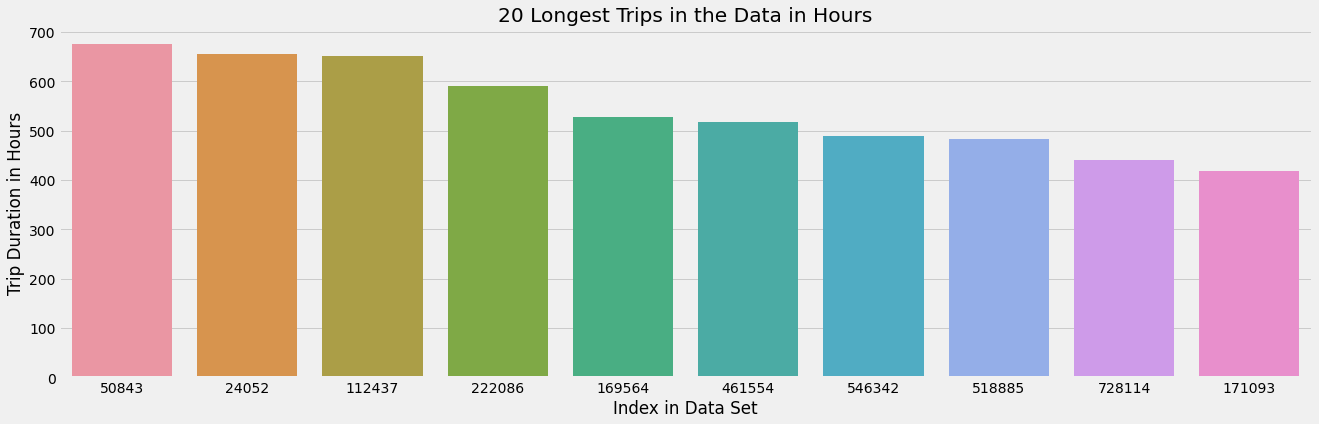

In [5]:
ten_highest = df.tripduration.sort_values(ascending = False)[:10]
ten_highest = ten_highest/3600 # in Hours
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 6)
highesttrip = sns.barplot(x = ten_highest.index , y =  ten_highest,order = ten_highest.index)
highesttrip.set_title('20 Longest Trips in the Data in Hours')
highesttrip.set(xlabel='Index in Data Set', ylabel='Trip Duration in Hours')

## 2.C. Shortest Trips in Seconds - Bar Plot
<a id="5"></a>

[Text(0.5, 0, 'Index in Data Set'), Text(0, 0.5, 'Trip Duration in Seconds')]

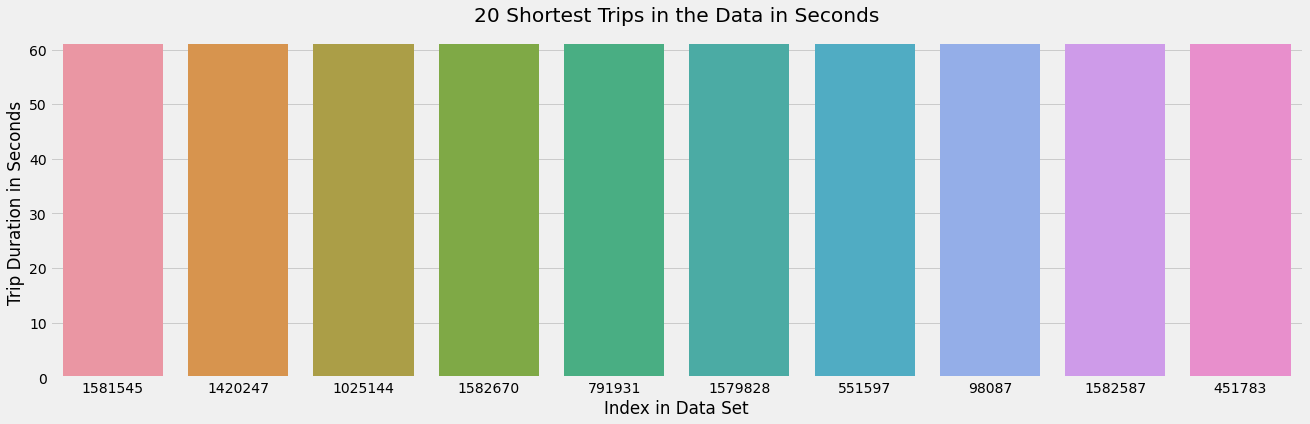

In [6]:
ten_lowest = df.tripduration.sort_values()[:10]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 6)
lowesttrip = sns.barplot(x = ten_lowest.index , y =  ten_lowest,order = ten_lowest.index)
lowesttrip.set_title('20 Shortest Trips in the Data in Seconds')
lowesttrip.set(xlabel='Index in Data Set', ylabel='Trip Duration in Seconds')

# Biggest distance between start point and end point (Aerial Line) in meters.

In [7]:
highest_distance = distance(df['start station latitude'],df['start station longitude'],df['end station latitude'],df['end station longitude']).sort_values(ascending = False)[:20]
highest_distance

1271245    16969.870980
713622     16853.385155
1573316    16550.867755
1647960    16550.867755
1129920    16550.867755
1843055    16502.725807
1836347    16482.355349
82678      16013.262085
777814     15496.562303
52883      15059.233098
1038230    14644.632852
71609      14557.425209
71562      14557.425209
1684765    14487.174543
1714719    14451.665127
829670     14379.733380
829660     14379.733380
519352     14359.293349
1789107    14355.911226
391014     14254.765198
dtype: float64

# 3. User type Data
<a id="6"></a>

## 3.A. Describe
<a id="7"></a>

In [8]:
df['usertype'].describe()

count        1877884
unique             2
top       Subscriber
freq         1616731
Name: usertype, dtype: object

## 3.B. User Type - Pie Chart
<a id="8"></a>

Text(0.5, 1.0, 'User Type Pie Chart')

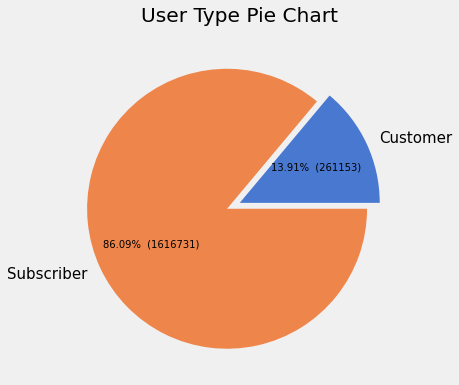

In [9]:
user_type_labels = df['usertype'].unique()
user_type_labels.sort()

total_usertype_entries = df.groupby("usertype").usertype.count()

data = [total_usertype_entries[0], total_usertype_entries[1]]

colors = sns.color_palette('muted')
patches, texts, autotexts = plt.pie(data, labels=user_type_labels, autopct=lambda n: '{:.2f}%  ({:.0f})'.format(n,n * sum(data)/100),explode=[0,0.1],colors=colors)
for label in autotexts:
  label.set_fontsize(10)
for label in texts:
  label.set_fontsize(15)  
plt.title('User Type Pie Chart')

# 4. Gender Data
<a id="9"></a>

## 4.A. Gender - Describe
<a id="10"></a>
0 - Unknown, 1 - Male, 2 - Female

In [10]:
df.gender.astype('str').describe()

count     1877884
unique          3
top             1
freq      1240964
Name: gender, dtype: object

## 4.B. Gender - Pie Chart
<a id="11"></a>

Text(0.5, 1.0, 'Gender Pie Chart')

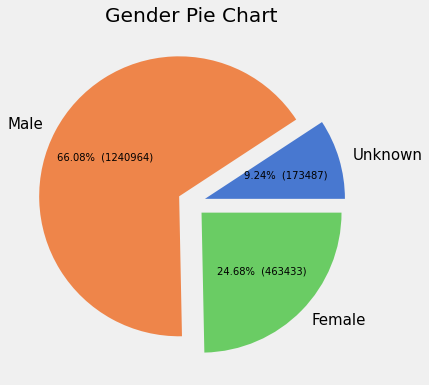

In [11]:
gender_labels = df['gender'].unique()
gender_labels.sort()
gender_dict = {0: "Unknown", 1: "Male", 2: "Female"}
gender_labels = [gender_dict[zi] for zi in gender_labels]

total_gender_entries = df.groupby("gender").gender.count()

data = [total_gender_entries[0], total_gender_entries[1],total_gender_entries[2]]

colors = sns.color_palette('muted')
patches, texts, autotexts = plt.pie(data, labels=gender_labels, autopct=lambda n: '{:.2f}%  ({:.0f})'.format(n,n * sum(data)/100),explode=[0.1,0.1,0.1],colors=colors)
for label in autotexts:
  label.set_fontsize(10)
for label in texts:
  label.set_fontsize(15)  
plt.title('Gender Pie Chart')

# 5. Bike ID
<a id="12"></a>

## 5.A. The most used bike
<a id="13"></a>

In [12]:
used = df.groupby('bikeid').bikeid.count().idxmax()
print(f'The most used bike ID is: {used}')

The most used bike ID is: 33875


# 6. Stations
<a id="14"></a>

## 6.A. Longest Trip start and stop stations
<a id="15"></a>

In [13]:
longest_trip_index = df.tripduration.idxmax()
starting_city = df['start station name'][longest_trip_index]
ending_city = df['end station name'][longest_trip_index]
print(f'The longest trip started at {starting_city} and ended at {ending_city}')

The longest trip started at Adam Clayton Powell Blvd & W 126 St and ended at Broadway & Battery Pl


## 6.B. The station with most starts
<a id="16"></a>

In [14]:
df.dropna()
stations_name = df['start station name'].unique()
total_starts = df.groupby("start station name")['start station name'].count()
print(f'{total_starts.idxmax()} is the most common starting station with {total_starts.max()} starts')

Pershing Square North is the most common starting station with 13968 starts


# 7. Mixed Analytics
<a id="17"></a>

## 7.A. Gender slicing in User Type
<a id="18"></a>

Text(0.5, 1.0, 'User Types and their Gender')

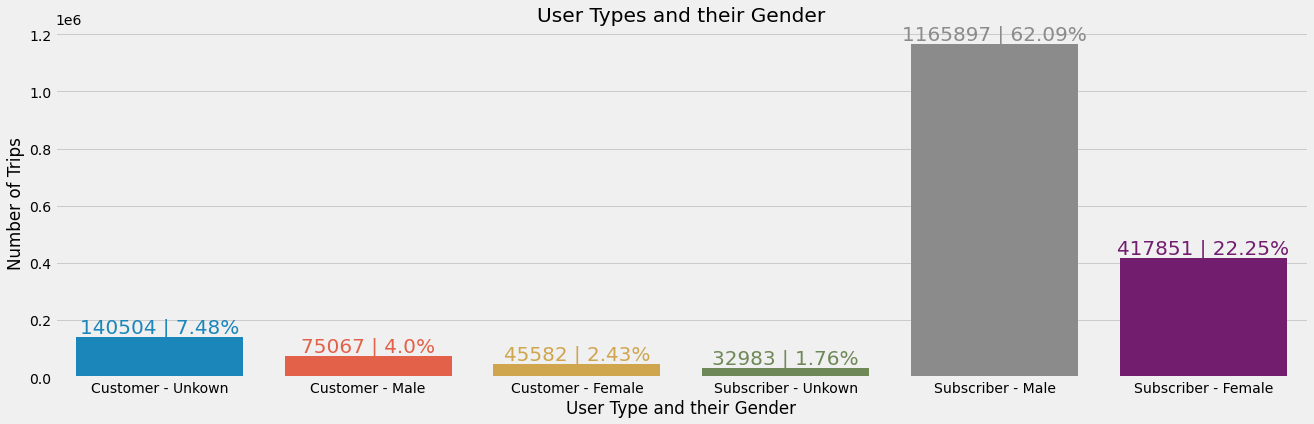

In [15]:
y = df.groupby(['usertype','gender']).gender.count()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 6)
usertype_gender = sns.barplot(x = ["Customer - Unkown","Customer - Male","Customer - Female","Subscriber - Unkown","Subscriber - Male","Subscriber - Female"], y = y)
for bar in usertype_gender.patches:
        bar_value = int(bar.get_height())
        bar_perc = round(bar_value/len(df['usertype'])*100,2)
        text = str(bar_value)+" | "+str(bar_perc)+"%"
        text_x = bar.get_x() + bar.get_width() / 2
        text_y = bar.get_y() + bar_value
        bar_color = bar.get_facecolor()
        usertype_gender.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,size=20)
usertype_gender.set(xlabel='User Type and their Gender', ylabel='Number of Trips')
usertype_gender.set_title('User Types and their Gender')



## 7.B. The age of most renters and their gender
<a id="19"></a>

In [16]:
birth_year_gender_sorted = df.groupby(['birth year','gender']).gender.count()
max_indexed = birth_year_gender_sorted.idxmax()
if max_indexed[1] == 0:
    tg = "Unknown"
if max_indexed[1] == 1:
    tg = "Male"
if max_indexed[1] == 2:
    tg = "Female"
print(f'The most bike riders are {2018 - max_indexed[0]} years old and their gender is {tg}, there are {birth_year_gender_sorted[max_indexed[0]].sum()} riders with the same age.')

The most bike riders are 49 years old and their gender is Unknown, there are 189582 riders with the same age.


# Number of users and their age

Text(0.5, 1.0, 'Number of users and their age')

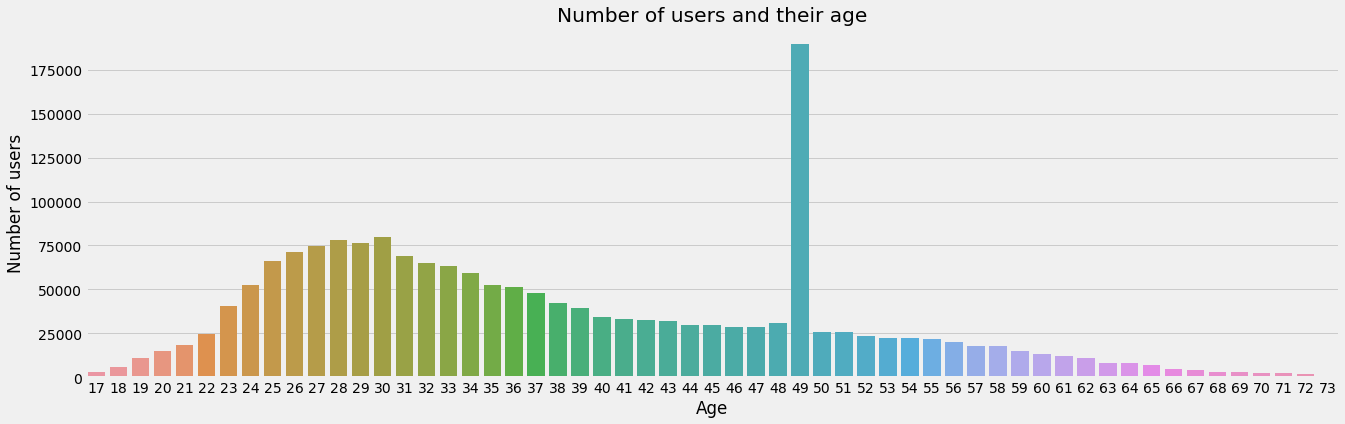

In [17]:
sorted_by_year = df.groupby('birth year')['birth year'].count()[df.groupby('birth year')['birth year'].count() > 1000]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 6)
age_histo = sns.barplot(x = (2018 - sorted_by_year.index), y = sorted_by_year.iloc[:])
age_histo.set(xlabel='Age', ylabel='Number of users')
age_histo.set_title('Number of users and their age')